# 1.3 模型选择
---
>前面提到了， 为了建立好的模型我们利用交叉验证(cross validation)的方法来进行训练。但是交叉验证的缺点也很明显，随着训练次数随“分割”的增加，训练时间也是很大的消耗。而且随着模型参数的每一次修改，这些分割的模型也会再一次修改。**PRML**书中讲了另一种方法。


### 1.3.1 AIC(赤池信息准则)

>赤池信息量准则（英语：Akaike information criterion，简称AIC）是评估统计模型的复杂度和衡量统计模型“拟合”资料之优良性（英语：Goodness of Fit，白话：合身的程度）的一种标准，是由日本统计学家赤池弘次创立和发展的。赤池信息量准则建立在信息熵的概念基础上
$$
AIC=2K-2ln(L)
$$
其中：k是参数的数量，L是似然函数

**结论**
- 参数越少，AIC值越小，模型越好
- 样本数越多，AIC值越小，模型越好

### 1.3.2 BIC(贝叶斯信息准则)

>BIC的惩罚项比AIC的大，考虑了样本数量，样本数量过多时，可有效防止模型精度过高造成的模型复杂度过高

$$
BIC=kln(n)-2ln(L)
$$

**说明：** 此书后面第4章会更详细的将AIC和BIC，本小节作者一笔带过了。


**下面时sklearn中的例子节选**

/home/xusenlan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


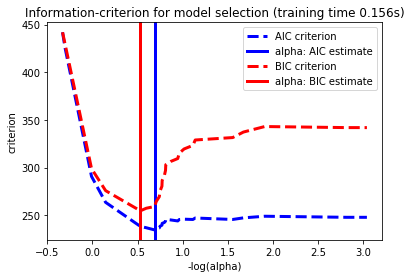

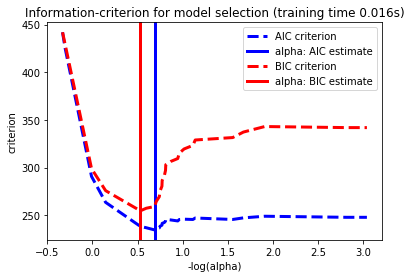

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)
plt.show()


# 1.4 维度灾难
---

## 1.4.1 什么是维度灾难

维度也就是数据集的特征，如果遵循奥卡姆剃刀原则， 数据的特征越简单越好。当维度很高时，某些重要的特征便会隐藏在一些无关的特征中；另一方面，训练数据时，对时间复杂度，和参数估计也是一种考验； 而且如果不对特征维度进行处理，那么一些具有相关性的特征，我们不做处理，模型的效果肯定是不好的。（例如：回归问题中的多重共线性）

## 1.4.2 解决方法

- 主成分分析法PCA
- 线性判别法LDA
- 奇异值分解简化数据
- 拉普拉斯特征映射
- Lassio缩减系数法
- 小波分析法



# 1.5 决策论
---
![](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/1.24.png)

## 1.5.1 最小化错误分类率（Minimizing the misclassification rate）
对监督学习中的分类问题来讲，我们需要一个“规则”，把每一个$x$分到合适的类别中去。这个“规则”会把输入空间分成不同的区域，这种区域叫做决策区域(decision region)，而决策区域的边界叫做决策边界或者叫决策面。如上图所示，如果我们将属于$C_1$类的值分到了$C_2$类中，那么我们就犯了一个错误。这种发生的概率如下：
$$
p(mistake) = p(x\in R_1, C_2)+p(x\in R_2, C_1)=\int_{R_1}p(x,C_2)\mathrm{d} x+\int_{R_2}p(x,C_1)\mathrm{d} x
$$
我们当然希望将错误降到最小，即最小化$p(mistake)$。根据乘积规则，

$$
p(x, C_k)=p(C_k|x)p(x)
$$
对最小化$p(x, C_k)$，那么需要最小化$p(C_k|x)$。故如果我们将

## 1.5.2 最小化期望损失(Minimizing the expected loss)

书中举了一个对癌症病人分类的例子，我这里简单阐述一下。分类问题我们都会出现两种错误。一，给没有患癌症的病人错误地诊断为癌症，二、给患了癌症的病人诊断为健康。我们给出如下混淆矩阵：
![image](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/else1.png)

接着，我们引出损失矩阵(loss matrix)，例如癌症这个例子，作者自己定义了一个损失矩阵，如下所示

![image](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/else2.png)
</center>

如上图所示，我们将正常人诊断为癌症的错误**损失**记为1，而将癌症诊断为正常的错误**损失**记为1000。常见的损失函数如下所示

(1)  0-1损失函数
$$
L(Y,f(X))=\left\{ \begin{array}{c}1, Y\neq f(X) \\0, Y= f(X)\end{array}\right.
$$
(2) 平方损失函数
$$
L(Y,f(X))=(Y-f(X))^2
$$

(3) 绝对损失函数
$$
L(Y,f(X))=|Y-f(X)|
$$

(4)对数损失函数
$$
L(Y,P(Y|X))=-logP(Y|X)
$$

## 1.5.3 拒绝选项(The reject option)
![image](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/1.26.png)

例如，在我们假想的医疗例⼦中，⼀种合适
的做法是，使⽤⾃动化的系统来对那些⼏乎没有疑问的X光片进行分类，然后把不容易分类的X光片留给医学专家。为了达到这个目的，我们引入一个阈值$\theta$拒绝后验概率$p(C_k|x)$的最大值小于等于$\theta$的那些样本。

## 1.5.4 推断和决策
作者下面讲了**生成式模型(generative models)**、**判别式模型(discriminative models)**、**异常检测(novelty detection)**

**(a) 生成式模型(generative models)**<br>
常见的生成式模型有：
- 朴素贝叶斯
- 隐马尔科夫模型

比如对训练集来讲，我们通过训练得到此数据集的分布，在根据决策论来确定新数据的类别。生成式模型就是生成数据分布的模型。也就是说我们需要对输入和输出进行“建模”。
<br>
**(b) 判别式模型(discriminative models)**<br>
常见的判别式模型如下：
- kNN
- 决策树
- 逻辑回归
- SVM

判别式模型我们需要确定$p(C_k|x)$,接着用决策论来对新的输入$x$进行分类。

![image](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/1.27.png)

## 1.5.5 回归问题中的损失函数
在回归问题中， 损失函数的一个通常的选择是平方损失，

$$
L(Y,f(X))=(Y-f(X))^2
$$
</center>
那么期望损失函数可以写成
$$
E[L]=\iint\left \{y(x)-t  \right \}^2p(x,t)dxdt
$$
</center>
那么有
$$
\frac{\partial E[L]}{\partial y(x)}=2\int\left \{y(x)-t  \right\}p(x,t)dt=0
$$
</center>
利用加和规则和乘积规则
$$
y(x)=\frac{\int tp(x,t)dt}{p(x)}=\int tp(t|x)dt=E_t[t|x]
$$
</center>
那么最优解是条件均值$y(x)=E_t[t|x]$

![image](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/1.28.png)


另一种推导：

![image](https://raw.githubusercontent.com/data2world/PRML_Note/master/IMG/CH01/else3.png)
